# Modelo Estocástico de Reforestación y Captura de Carbono

Este ejercicio simula el crecimiento del área de un bosque reforestado durante 20 años, considerando la posibilidad de eventos aleatorios que afectan dicho crecimiento.

## Descripción del modelo
Cada año, el área del bosque puede crecer o reducirse dependiendo de un evento aleatorio:

- **Incendio** (probabilidad = 0.2): reduce el área en un 30%.
- **Plaga** (probabilidad = 0.1): reduce el área en un 15%.
- **Protección** (probabilidad = 0.3): aumenta la tasa de crecimiento a 8%.
- **Sin evento** (probabilidad = 0.4): el crecimiento se mantiene en 5%.

La ecuación básica de crecimiento es:

$
A_t = A_{t-1} \times (1 + r_t)
$

Donde:
- $( A_t )$: área del bosque en el año $( t )$
- $( r_t )$: tasa de crecimiento o decrecimiento, según el evento ocurrido

## Reflexiones para el análisis
- ¿Qué sucede si cambiamos las probabilidades de los eventos?
- ¿Qué papel juega la semilla (`np.random.seed()`)? ¿Por qué usarla o no?
- ¿Cómo podríamos usar simulaciones múltiples para representar la incertidumbre del sistema?


### ¿Qué es `np.random.choice`?

Es una función de **NumPy** que permite elegir un elemento (o varios) de una lista o array, de manera aleatoria. Es muy útil para simulaciones donde se desea introducir incertidumbre o eventos aleatorios con diferentes probabilidades.

#### Sintaxis básica:

`np.random.choice(lista_de_opciones, probabilidades)`

`np.random.choice(['incendio', 'plaga', 'protección', 'normal'],p=[0.2, 0.1, 0.3, 0.4])`

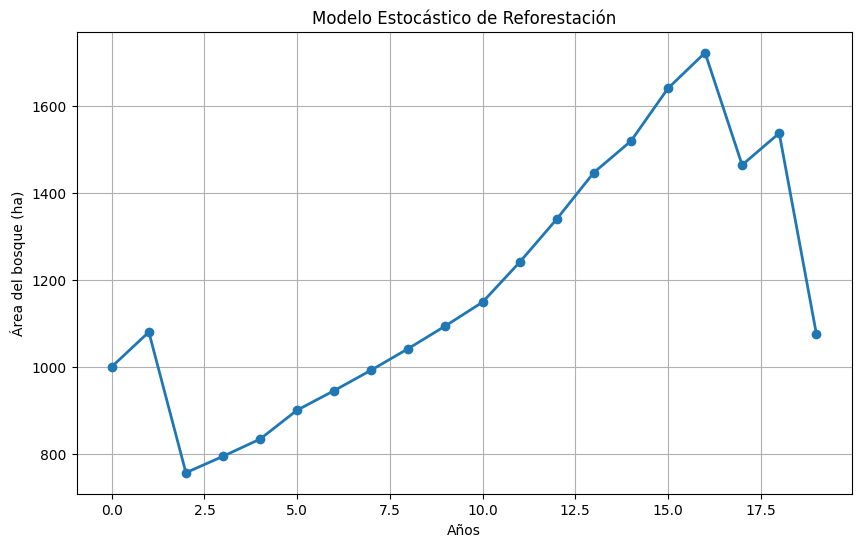

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros iniciales
#np.random.seed(42) #Para hacer que sea reproducible (representa los mismos resultados en todas las corridas)
años = 20
area_inicial = 1000 #hectareas
area = [area_inicial]

# Simulación estocástica
for t in range(1, años):
  evento = np.random.choice(['incendio', 'plaga', 'protección', 'normal'], p=[0.2, 0.1, 0.3, 0.4])

  if evento == 'incendio':
      nueva_area = area[-1] * 0.7
  elif evento == 'plaga':
      nueva_area = area[-1] * 0.85
  elif evento == 'protección':
      nueva_area = area[-1] * 1.08
  else: #normal
      nueva_area = area[-1] * 1.05

  area.append(nueva_area)


#Gráfica
plt.figure(figsize=(10,6))
plt.plot(range(años), area, marker='o', linewidth=2)
plt.title('Modelo Estocástico de Reforestación')
plt.xlabel('Años')
plt.ylabel('Área del bosque (ha)')
plt.grid(True)
plt.show()

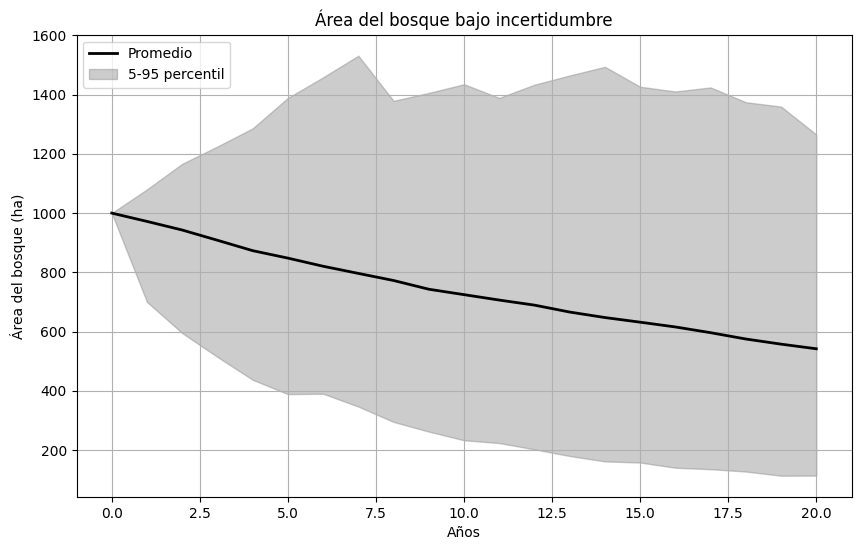

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
n_simulaciones = 1000
años = 20
area_inicial = 1000

# Guardar todas las trayectorias
trayectorias = np.zeros((n_simulaciones, años + 1))

for i in range(n_simulaciones):
    area = [area_inicial]
    for t in range(años):
        evento = np.random.choice(
            ['incendio', 'plaga', 'protección', 'normal'],
            p=[0.2, 0.1, 0.3, 0.4]
        )
        if evento == 'incendio':
            area.append(area[-1] * 0.7)
        elif evento == 'plaga':
            area.append(area[-1] * 0.85)
        elif evento == 'protección':
            area.append(area[-1] * 1.08)
        else:
            area.append(area[-1] * 1.05)
    trayectorias[i] = area

# Calcular estadísticas
promedio = np.mean(trayectorias, axis=0)
p5 = np.percentile(trayectorias, 5, axis=0)
p95 = np.percentile(trayectorias, 95, axis=0)

# Graficar
plt.figure(figsize=(10,6))
plt.plot(promedio, label='Promedio', color='black', linewidth=2)
plt.fill_between(range(años+1), p5, p95, color='gray', alpha=0.4, label='5-95 percentil')
plt.title('Área del bosque bajo incertidumbre')
plt.xlabel('Años')
plt.ylabel('Área del bosque (ha)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Estadísticos de una simulación del metodo Monte Carlo.
promedio = np.mean(trayectorias[:,10])
p5 = np.percentile(trayectorias[:,10], 5)
p95 = np.percentile(trayectorias[:,10], 95)

promedio, p5, p95

(np.float64(724.7100812501697),
 np.float64(233.22258760499997),
 np.float64(1434.9143756965507))

## Análisis de Resultados de la Simulación Monte Carlo

La gráfica anterior muestra la evolución del área de bosque simulada durante 20 años, bajo la influencia de eventos estocásticos como incendios, plagas y políticas de protección ambiental.

- La **línea negra**, representa el promedio de las 1000 simulaciones.
- La **zona gris**, cubre el intervalo entre los percentiles 5 y 95 (es decir, el 90% de las trayectorias posibles).

---

### 1. Incertidumbre inherente al sistema

El área sombreada muestra que, aunque todas las simulaciones parten del mismo valor inicial (1000 ha), los resultados posibles después de 20 años varían enormemente:

- Algunas trayectorias llevan a una expansión del bosque (más de 1400 ha).
- Otras muestran una fuerte degradación (menos de 200 ha).

Esto refleja la **incertidumbre inherente al sistema**, donde la aleatoriedad en los eventos anuales tiene un efecto acumulado significativo. El modelo es sensible a las secuencias de eventos aleatorios.

---

### 2. Robustez frente a eventos adversos

La **tendencia descendente del promedio** indica que el modelo, en su configuración actual, **no es muy robusto** ante eventos negativos:

- Aunque hay casos donde el área del bosque aumenta, el promedio cae por debajo de 600 ha en 20 años.
- Esto sugiere que los eventos destructivos (incendios y plagas) ocurren con suficiente frecuencia como para predominar sobre el crecimiento natural y las políticas de protección.

---

### 3. Efectividad de las políticas de protección

Los casos en el extremo superior del intervalo (percentil 95) muestran que **las políticas de protección pueden tener un impacto positivo**, permitiendo incluso que el área forestal crezca por encima del valor inicial.

Sin embargo, esto ocurre solo en escenarios favorables, y **no son suficientes para revertir la tendencia general**:

- La frecuencia o intensidad de estas políticas debe ser mayor para cambiar la trayectoria promedio.
- Se podrían explorar estrategias como aumentar la tasa de crecimiento con protección o disminuir la probabilidad de incendios.

---

### Conclusión

Este análisis demuestra la importancia de usar simulaciones Monte Carlo para:

- Evaluar la **variabilidad y el riesgo** en sistemas ambientales.
- Tomar decisiones basadas en **probabilidades y rangos de resultado**, no solo en promedios.
- Identificar **escenarios críticos y puntos de intervención**, como el fortalecimiento de políticas de protección para mejorar la sostenibilidad del sistema.



# **Ejercicio de Clase**

# Simulación Monte Carlo - Pronóstico de Sostenibilidad Hídrica

## Objetivo

Simular cómo evoluciona el **almacenamiento de agua** en una cuenca durante 20 años, considerando la incertidumbre en la precipitación, la demanda de agua y el balance hídrico anual.

---

## Variables

| Variable | Descripción |
|----------|-------------|
| `Pₜ` | Precipitación anual en el año `t` (mm) |
| `Dₜ` | Demanda de agua en el año `t` (m³) |
| `Oₜ` | Oferta de agua en el año `t` (m³) |
| `Sₜ` | Almacenamiento acumulado de agua al final del año `t` (m³) |

---

## Lógica del modelo

1. Se simulan `1000` trayectorias de 20 años.
2. En cada año `t`:
   - Se genera una precipitación aleatoria y se calcula la oferta de agua.
   - Se genera una demanda aleatoria.
   - Se calcula el balance hidrico anual:  
  $\Delta{S_t} = O_t - D_t$
   - Se actualiza el almacenamiento total:
  $S_{t+1} = \max(S_t + \Delta S_t,\ 0)$.  
     Si hay déficit, el almacenamiento disminuye; si hay excedente, se incrementa.

---

## Parámetros usados

- Superficie de la cuenca: `A = 500 km²`
- Eficiencia de escorrentía: `e = 0.3`
- Precipitación: `N(1200, 200) mm/año`
- Demanda: `N(300e6, 50e6) m³/año`
- Almacenamiento inicial: `1,000 millones m³`

---

## Resultados esperados

- Visualización de múltiples trayectorias del almacenamiento de agua.
- Cálculo del **promedio**, **percentil 5** y **percentil 95** del almacenamiento.
- Identificación del riesgo de agotamiento de agua en escenarios extremos.

---

## Extensiones posibles

- Modelar **reforestación** como un aumento gradual en la eficiencia `e`.
- Simular políticas de **reducción de demanda**.
- Analizar impactos del **cambio climático** reduciendo la media de `P`.

---


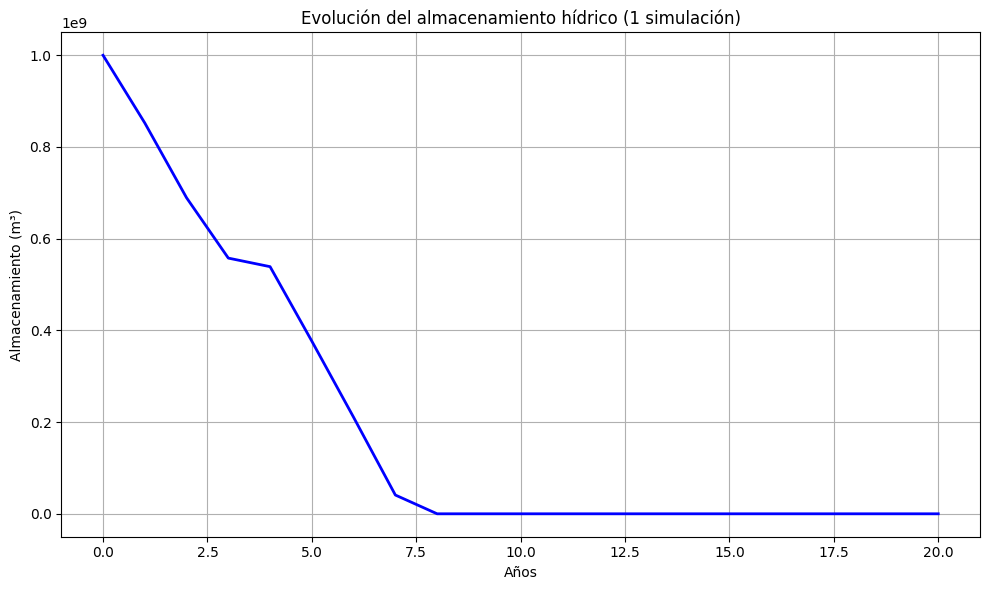

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
n_years = 20
A = 500         # km²
e = 0.3         # eficiencia
storage0 = 1e9  # almacenamiento inicial (1,000 millones m³)

# Inicialización
storage = np.zeros(n_years + 1)
storage[0] = storage0

# Simulación para una sola trayectoria
for t in range(n_years):
    P = np.random.normal(1200, 200)     # mm/año
    D = np.random.normal(300e6, 50e6)   # m³/año
    O = P * e * A * 1e6 / 1000          # m³/año
    delta_S = O - D
    storage[t+1] = max(storage[t] + delta_S, 0)

# Visualización
plt.figure(figsize=(10,6))
plt.plot(storage, color='blue', linewidth=2)
plt.title("Evolución del almacenamiento hídrico (1 simulación)")
plt.xlabel("Años")
plt.ylabel("Almacenamiento (m³)")
plt.grid(True)
plt.tight_layout()
plt.show()
